<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboratorio 2: Modelos de Regresión Lineal**

In [168]:
#del df_origen
#del df
#del dt

In [1]:
#Importar librerías para Análisis EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_theme(style='darkgrid', palette='dark', font='sans-serif')
#Style: 'whitegrid', 'dark', 'white', 'ticks', 'darkgrid'
#Palette: 'tab10', 'pastel', 'deep', 'muted', 'bright', 'dark'
#font: 'sans-serif'

In [6]:
#Cargar dataset (demora alrededor de 2-3 minutos)
df_origen = pd.read_csv('/content/Datos_Propiedades_new.csv', index_col=0)

**Análisis Exploratorio de Datos**

In [16]:
#Tamaño del dataframe
print('(filas, columnas) = ',df_origen.shape)
print(format(df_origen.size, ','),' registros')

(filas, columnas) =  (146660, 15)
2,199,900  registros


In [19]:
#Primeros datos
df_origen.head(10)

,start_date,end_date,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type
0,2019-10-17,2019-12-23,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento
1,2019-10-17,2019-11-21,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH
2,2019-10-17,2019-11-01,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH
3,2019-10-17,2019-12-23,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH
4,2019-10-17,2020-03-11,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,PH
5,2019-10-17,2019-11-01,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH
6,2019-10-17,2019-10-31,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,PH
7,2019-10-17,2019-10-31,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,PH
8,2019-10-17,2019-12-23,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,PH
9,2019-10-17,2019-12-23,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,PH


In [18]:
#Últimos datos
df_origen.tail(10)

,start_date,end_date,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type
146650,2019-07-31,2019-08-14,-34.432190,-58.798015,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,2.0,48.0,48.0,159900.0,USD,Departamento
146651,2019-07-31,2019-09-01,-34.433331,-58.797736,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,53.0,53.0,118380.0,USD,Departamento
146652,2019-07-31,2019-08-14,-34.582228,-58.540320,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,2.0,1.0,1.0,38.0,38.0,70000.0,USD,Departamento
146653,2019-07-31,2019-08-13,-34.613848,-58.542955,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,2.0,1.0,1.0,45.0,45.0,110000.0,USD,PH
146654,2019-07-31,2019-11-02,-34.602389,-58.591058,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,2.0,161.0,80.0,200000.0,USD,Departamento
146655,2019-07-31,2019-08-13,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento
146656,2019-07-31,2019-08-14,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Departamento
146657,2019-07-31,2019-08-14,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Departamento
146658,2019-07-31,2019-08-14,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento
146659,2019-07-31,2019-10-12,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento


In [20]:
#Nombre de columnas como set de datos
df_origen.columns

Index(['start_date', 'end_date', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'property_type'],
      dtype='object')

In [21]:
#Tipos de variables
df_origen.dtypes

start_date          object
end_date            object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
property_type       object
dtype: object

In [22]:
#Valores nulos
df_origen.isnull().sum()

start_date             0
end_date               0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
property_type          0
dtype: int64

In [23]:
#Datos únicos por variable
#Observar l1 que tiene un solo valor único
df_origen.nunique()

start_date           366
end_date             412
lat                59636
lon                60075
l1                     1
l2                     4
l3                    89
rooms                 25
bedrooms              16
bathrooms             14
surface_total       1843
surface_covered      876
price               6821
currency               1
property_type         10
dtype: int64

# **Preparamos nuestro dataframe a emplear como modelo**

In [24]:
#Nuevo dataframe
#Eliminamos: 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1','currency','title', 'description'
df=df_origen[['l2', 'l3','rooms', 'bedrooms', 'bathrooms', 'surface_covered','price', 'property_type']]

In [25]:
#Tamaño nuevo dataframe
print('(filas, columnas) = ',df.shape)
print(format(df.size,','),' registros')

(filas, columnas) =  (146660, 8)
1,173,280  registros


In [26]:
#Resumen estadístico nuevo dataframe
#Ojo que no está considerando las variables cualitativas/descriptivas
df.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,146660.000000,146660.000000,140703.000000,125046.000000,1.466600e+05
mean,3.079817,1.983240,1.599994,112.818011,2.412211e+05
std,1.416352,1.151304,0.889324,916.857584,3.185195e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,1.110000e+05
50%,3.000000,2.000000,1.000000,68.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,126062.000000,3.243423e+07


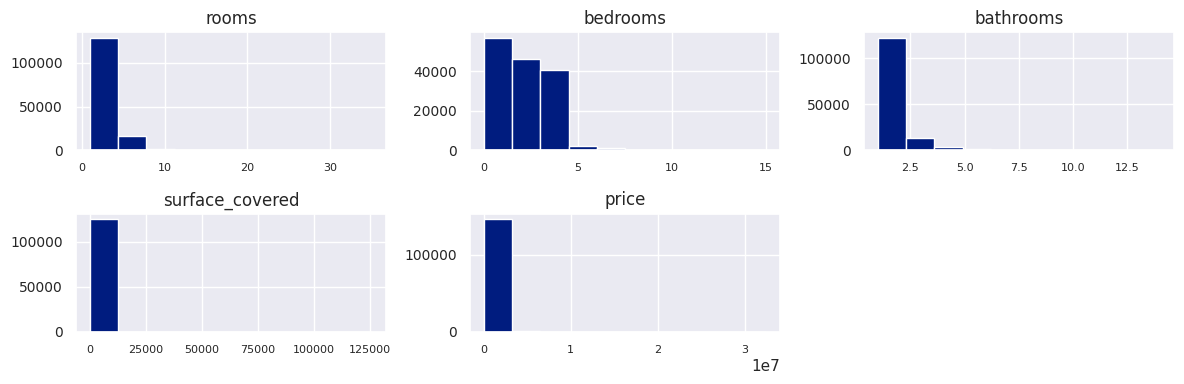

In [34]:
#Histograma variables nuevo dataframe
df.hist(xlabelsize=8,ylabelsize=10,figsize=(12,4),layout=(2,3))
plt.tight_layout()
plt.show()

# ***Variable Rooms***

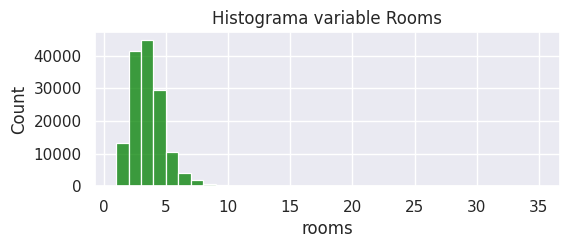

In [35]:
#Histograma variable 'rooms'
plt.figure(figsize=(6,2))
plt.title('Histograma variable Rooms')
sns.histplot(df['rooms'], binwidth=1, stat='count', color='green')
plt.show()

In [36]:
#Cantidad de rooms
df['rooms'].value_counts().sort_index()

1.0     13108
2.0     41283
3.0     44925
4.0     29336
5.0     10582
6.0      4156
7.0      1823
8.0       812
9.0       236
10.0      223
11.0       46
12.0       53
13.0       13
14.0       12
15.0       18
16.0       12
18.0        5
20.0        7
21.0        2
24.0        1
25.0        2
26.0        2
30.0        1
32.0        1
35.0        1
Name: rooms, dtype: int64

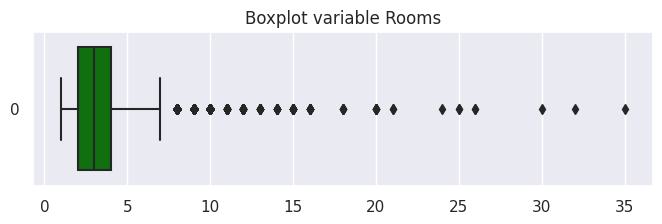

In [39]:
#Boxplot variable 'rooms'
plt.figure(figsize=(8,2))
plt.title('Boxplot variable Rooms')
sns.boxplot(data=df['rooms'],orient="h", color='green')
plt.show()

In [38]:
#Limpieza de datos a partir de variable rooms
df2=df.drop(df[df.rooms>=8].index, inplace=False)

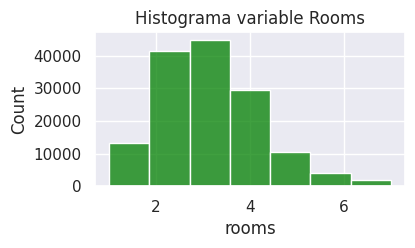

In [40]:
#Nuevo Histograma variable 'rooms'
plt.figure(figsize=(4,2))
plt.title('Histograma variable Rooms')
sns.histplot(df2['rooms'], bins=7, stat='count', color='green')
plt.show()

In [41]:
#Resumen estadístico nuevo dataframe
df2.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,145213.000000,145213.000000,139297.000000,123736.000000,1.452130e+05
mean,3.019013,1.950011,1.578893,110.096189,2.365631e+05
std,1.263711,1.082239,0.852445,918.550126,3.090946e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,67.000000,1.650000e+05
75%,4.000000,3.000000,2.000000,105.000000,2.600000e+05
max,7.000000,15.000000,14.000000,126062.000000,3.243423e+07


# ***Variable Bedrooms***

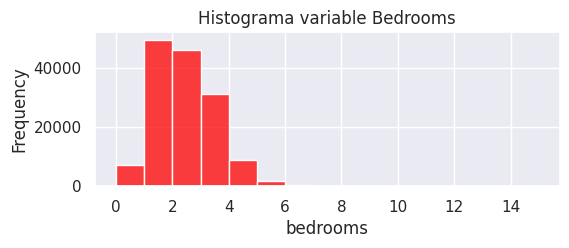

In [42]:
#Histograma variable 'bedrooms'
plt.figure(figsize=(6,2))
plt.title('Histograma variable Bedrooms')
sns.histplot(df2['bedrooms'], binwidth=1, stat='frequency', color='red')
plt.show()

In [44]:
#Cantidad de bedrooms
df2['bedrooms'].value_counts().sort_index()

0.0      7054
1.0     49700
2.0     46005
3.0     31362
4.0      8754
5.0      1759
6.0       543
7.0        22
8.0         2
9.0         3
10.0        1
11.0        5
12.0        1
13.0        1
15.0        1
Name: bedrooms, dtype: int64

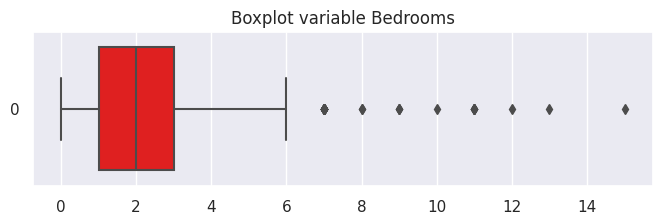

In [45]:
#Boxplot variable 'bedrooms'
plt.figure(figsize=(8,2))
plt.title('Boxplot variable Bedrooms')
sns.boxplot(data=df2['bedrooms'],orient="h", color='red')
plt.show()

In [46]:
#Limpieza de datos a partir de variable bedrooms
df3=df2.drop(df2[df2.bedrooms>=7].index, inplace=False)

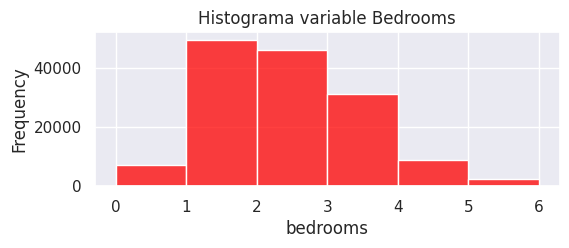

In [47]:
#Nuevo Histograma variable 'bedrooms'
plt.figure(figsize=(6,2))
plt.title('Histograma variable Bedrooms')
sns.histplot(df3['bedrooms'], bins=6, stat='frequency', color='red')
plt.show()

In [48]:
#Resumen estadístico nuevo dataframe
df3.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,145177.000000,145177.000000,139262.000000,123702.000000,1.451770e+05
mean,3.018384,1.948415,1.578442,110.062691,2.365484e+05
std,1.262786,1.077105,0.851353,918.669078,3.091111e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,67.000000,1.650000e+05
75%,4.000000,3.000000,2.000000,105.000000,2.600000e+05
max,7.000000,6.000000,14.000000,126062.000000,3.243423e+07


# ***Variable Bathrooms***

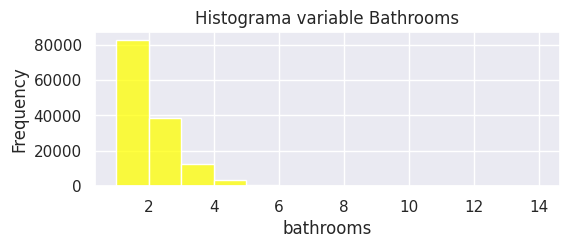

In [49]:
#Histograma variable 'bathrooms'
plt.figure(figsize=(6,2))
plt.title('Histograma variable Bathrooms')
sns.histplot(df3['bathrooms'], binwidth=1, stat='frequency', color='yellow')
plt.show()

In [50]:
#Cantidad de bathrooms
df3['bathrooms'].value_counts().sort_index()

1.0     82878
2.0     38837
3.0     12653
4.0      3649
5.0       942
6.0       222
7.0        54
8.0         5
9.0         3
10.0        5
11.0        7
12.0        1
14.0        6
Name: bathrooms, dtype: int64

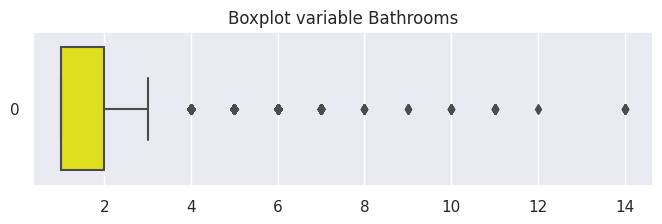

In [51]:
#Boxplot variable 'bathrooms'
plt.figure(figsize=(8,2))
plt.title('Boxplot variable Bathrooms')
sns.boxplot(data=df2['bathrooms'],orient="h", color='yellow')
plt.show()

In [52]:
#Limpieza de datos a partir de variable bathrooms
df4=df3.drop(df3[df3.bathrooms>=4].index, inplace=False)

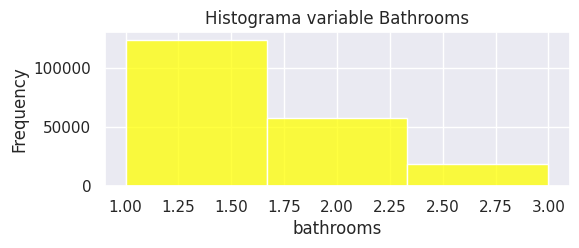

In [53]:
#Nuevo Histograma variable 'bathrooms'
plt.figure(figsize=(6,2))
plt.title('Histograma variable Bathrooms')
sns.histplot(df4['bathrooms'], bins=3, stat='frequency', color='yellow')
plt.show()

In [54]:
#Resumen estadístico nuevo dataframe
df4.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,140283.000000,140283.000000,134368.000000,119646.000000,1.402830e+05
mean,2.951455,1.892638,1.477368,103.301189,2.160467e+05
std,1.214148,1.033078,0.661683,881.595972,2.494822e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,46.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,65.000000,1.600000e+05
75%,4.000000,3.000000,2.000000,100.000000,2.500000e+05
max,7.000000,6.000000,3.000000,126062.000000,2.665353e+07


# ***Variables Superficie y Precio***

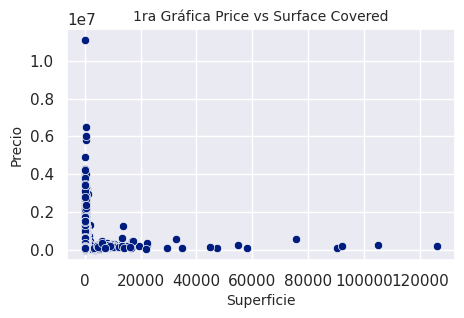

In [55]:
#Gráfico 1 Precio vs Superficie
plt.figure(figsize=(5,3))
plt.title('1ra Gráfica Price vs Surface Covered', fontsize=10)
plt.ylabel('Precio', fontsize=10);
plt.xlabel('Superficie', fontsize=10);
sns.scatterplot(data=df4, x='surface_covered', y='price')
plt.show()

In [56]:
#Limpieza de datos a partir de variable surface_covered
df5=df4.drop(df4[df4.surface_covered>500].index, inplace=False)

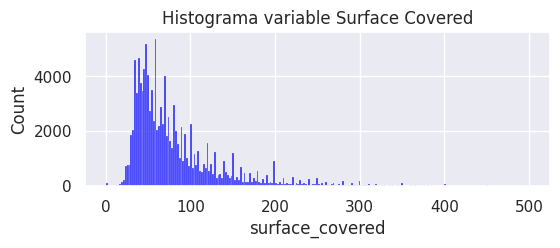

In [57]:
#Histograma variable 'surface_covered'
plt.figure(figsize=(6,2))
plt.title('Histograma variable Surface Covered')
sns.histplot(df5['surface_covered'], color='blue')
plt.show()

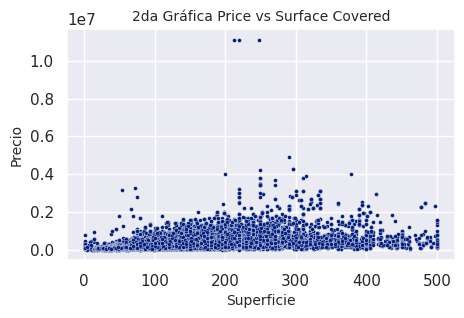

In [58]:
#Gráfico 2 Precio vs Superficie
plt.figure(figsize=(5,3))
plt.title('2da Gráfica Price vs Surface Covered', fontsize=10)
plt.ylabel('Precio', fontsize=10);
plt.xlabel('Superficie', fontsize=10);
sns.scatterplot(data=df5, x='surface_covered', y='price', s=8)
plt.show()

In [59]:
#Resumen estadístico nuevo dataframe
df5.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,139887.000000,139887.000000,134005.000000,119250.000000,1.398870e+05
mean,2.949152,1.890826,1.476743,83.543161,2.153839e+05
std,1.211884,1.031732,0.661156,57.928629,2.448932e+05
min,1.000000,0.000000,1.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,46.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,65.000000,1.600000e+05
75%,4.000000,3.000000,2.000000,100.000000,2.500000e+05
max,7.000000,6.000000,3.000000,500.000000,2.665353e+07


In [60]:
#Limpieza de datos a partir de variable price muy alta y superficie=1
df6=df5.drop(df5[df5.price>2.5e+05].index, inplace=False)
df6.drop(df6[df6.surface_covered<25].index, inplace=True)

In [61]:
#Dividimos valor del precio en 1.000
df6['price']=df6['price']/1000

In [62]:
#Resumen estadístico nuevo dataframe
df6.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,105060.000000,105060.000000,100628.000000,88688.000000,105060.000000
mean,2.661422,1.654140,1.266059,66.785788,140.687902
std,1.059511,0.910614,0.494916,39.724652,53.172138
min,1.000000,0.000000,1.000000,25.000000,5.500000
25%,2.000000,1.000000,1.000000,43.000000,98.000000
50%,3.000000,2.000000,1.000000,55.000000,135.000000
75%,3.000000,2.000000,1.000000,76.000000,180.000000
max,7.000000,6.000000,3.000000,500.000000,250.000000


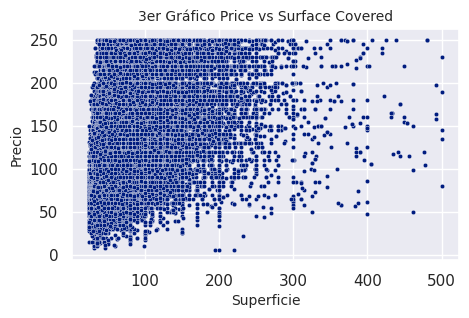

In [63]:
#Gráfico 3 Precio vs Superficie
plt.figure(figsize=(5,3))
plt.title('3er Gráfico Price vs Surface Covered', fontsize=10)
plt.ylabel('Precio', fontsize=10);
plt.xlabel('Superficie', fontsize=10);
sns.scatterplot(data=df6, x='surface_covered', y='price', s=10)
plt.show()

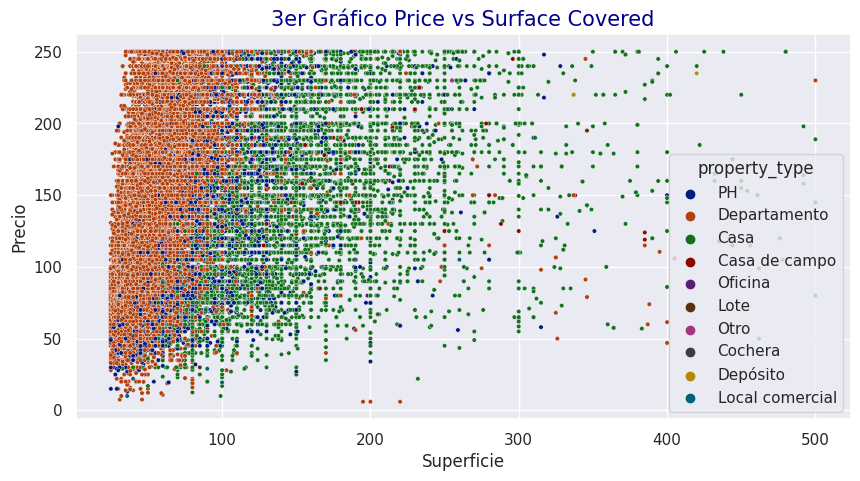

In [64]:
#Gráfico 3 Precio vs Superficie con etiqueta tipo de propiedades
plt.figure(figsize=(10,5))
plt.title('3er Gráfico Price vs Surface Covered', fontsize=15, color='darkblue')
plt.ylabel('Precio', fontsize=12);
plt.xlabel('Superficie', fontsize=12);
sns.scatterplot(data=df6, x='surface_covered', y='price', s=10, hue='property_type')
plt.show()

In [65]:
df6.columns

Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_covered',
       'price', 'property_type'],
      dtype='object')

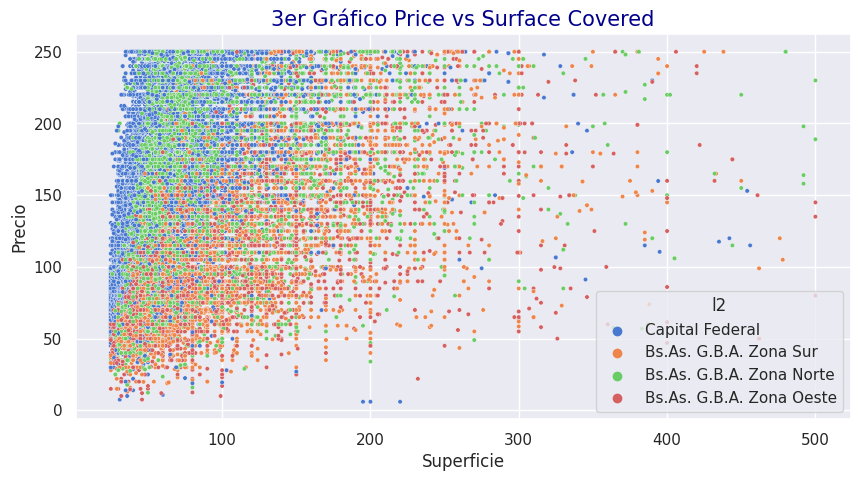

In [66]:
#Gráfico 3 Precio vs Superficie con etiqueta l2
plt.figure(figsize=(10,5))
plt.title('3er Gráfico Price vs Surface Covered', fontsize=15, color='darkblue')
plt.ylabel('Precio', fontsize=12);
plt.xlabel('Superficie', fontsize=12);
sns.scatterplot(data=df6, x='surface_covered', y='price', s=10, hue='l2', palette='muted')
plt.show()

# ***Variable Tipo de Propiedades***

In [67]:
#Tipo de propiedades distintas
df6['property_type'].unique()

array(['PH', 'Departamento', 'Casa', 'Casa de campo', 'Oficina', 'Lote',
       'Otro', 'Cochera', 'Depósito', 'Local comercial'], dtype=object)

In [68]:
#Frecuencia de tipo de propiedades
df6['property_type'].value_counts()

Departamento       79291
Casa               12736
PH                 10804
Lote                 796
Oficina              501
Cochera              257
Casa de campo        219
Local comercial      191
Otro                 183
Depósito              82
Name: property_type, dtype: int64

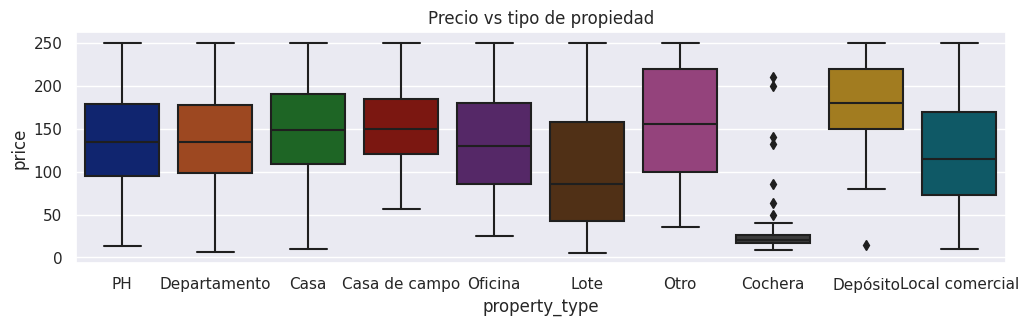

In [69]:
plt.figure(figsize=(12, 3))
plt.title('Precio vs tipo de propiedad')
sns.boxplot(data=df6, x='property_type', y='price')
plt.show()

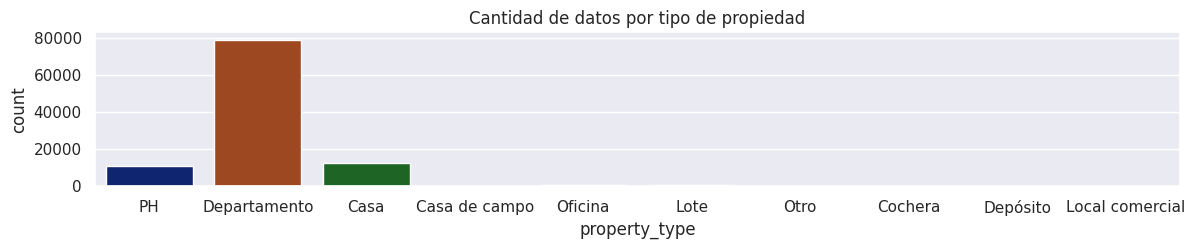

In [70]:
plt.figure(figsize=(14, 2))
plt.title('Cantidad de datos por tipo de propiedad')
sns.countplot(x = df6['property_type'])
plt.show()

In [71]:
#Vamos a eliminar 'Lote', 'Oficina', 'Casa de campo', 'Otro', 'Local comercial', 'Depósito', 'Cochera'
df7=df6.drop(df6[(df6['property_type'].isin(['Lote','Oficina','Casa de campo',
                                      'Otro','Local comercial','Depósito','Cochera'])
            )].index, inplace=False)

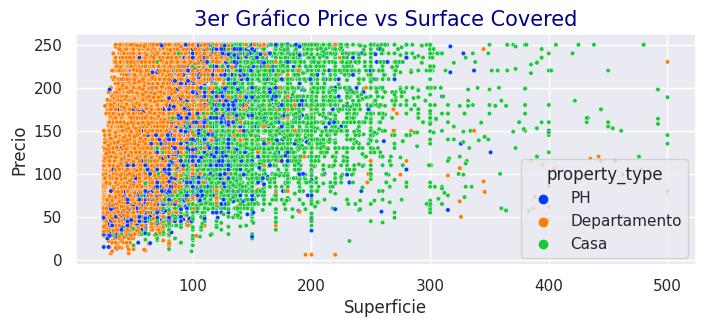

In [72]:
#Gráfico 4 Precio vs Superficie con etiqueta tipo de propiedades
plt.figure(figsize=(8,3))
plt.title('3er Gráfico Price vs Surface Covered', fontsize=15, color='darkblue')
plt.ylabel('Precio', fontsize=12);
plt.xlabel('Superficie', fontsize=12);
sns.scatterplot(data=df7, x='surface_covered', y='price', s=10, hue='property_type', palette='bright')
plt.show()

In [73]:
#Revisamos la Frecuencia de tipo de propiedades
df7['property_type'].value_counts()

Departamento    79291
Casa            12736
PH              10804
Name: property_type, dtype: int64

**Observación:**

In [75]:
#Para efectos prácticso del modelo, solo utilizaremos el tipo de propiedad = CASA y PENTHOUSE
df7.drop(df7[(df7['property_type']=='Departamento')].index, inplace=True)

In [76]:
#Variables a utilizar en nuestro modelo:
df7.columns

Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_covered',
       'price', 'property_type'],
      dtype='object')

# **Valores nulos**

In [77]:
#Datos nulos
df7.isnull().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           993
surface_covered    3003
price                 0
property_type         0
dtype: int64

In [78]:
#Reemplazamos los datos faltantes de bathrooms por su promedio
df7['bathrooms']=df7['bathrooms'].fillna(df7['bathrooms'].mean(skipna = True))

In [79]:
#Comprobamos que no existan datos nulos en variable bathrooms
df7['bathrooms'].isnull().sum()

0

In [80]:
#Eliminar datos nulos:
df8=df7.dropna()

# **Valores duplicados**

In [81]:
#Eliminar valores duplicados
dt=df8.drop_duplicates()

In [82]:
dt['property_type'].value_counts()

Casa    8164
PH      7634
Name: property_type, dtype: int64

In [83]:
print('(filas, columnas) = ',dt.shape)
print(format(dt.size,','),' registros en dt')
print(format(df_origen.size,','),' registros en df origen')

(filas, columnas) =  (15798, 8)
126,384  registros en dt
2,199,900  registros en df origen


In [84]:
#Frecuencia de l2
dt['l2'].value_counts()

Capital Federal             4832
Bs.As. G.B.A. Zona Sur      4001
Bs.As. G.B.A. Zona Norte    3492
Bs.As. G.B.A. Zona Oeste    3473
Name: l2, dtype: int64

In [85]:
#Abreviamos el nombre de la zona (l2)
dt['l2']=dt['l2'].replace('Capital Federal','Capital')
dt['l2']=dt['l2'].replace('Bs.As. G.B.A. Zona Norte','Zona Norte')
dt['l2']=dt['l2'].replace('Bs.As. G.B.A. Zona Sur','Zona Sur')
dt['l2']=dt['l2'].replace('Bs.As. G.B.A. Zona Oeste','Zona Oeste')

<ipython-input-85-6f5bc38d7d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['l2']=dt['l2'].replace('Capital Federal','Capital')
<ipython-input-85-6f5bc38d7d5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['l2']=dt['l2'].replace('Bs.As. G.B.A. Zona Norte','Zona Norte')
<ipython-input-85-6f5bc38d7d5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [87]:
# Comprobamos
dt['l2'].value_counts()

Capital       4832
Zona Sur      4001
Zona Norte    3492
Zona Oeste    3473
Name: l2, dtype: int64

# ***Variable l3***

In [88]:
#Revisemos cuántos datos distintos hay en l3
print(dt['l3'].nunique(), 'valores únicos')
dt['l3'].value_counts()

87 valores únicos


La Plata                1318
La Matanza               940
Tres de Febrero          770
Pilar                    703
General San Martín       648
                        ... 
Once                      10
Las Cañitas                5
Retiro                     5
Centro / Microcentro       4
Tribunales                 1
Name: l3, Length: 87, dtype: int64

In [89]:
#Eliminamos l3 del set de datos
dt=dt.drop(['l3'], axis=1)

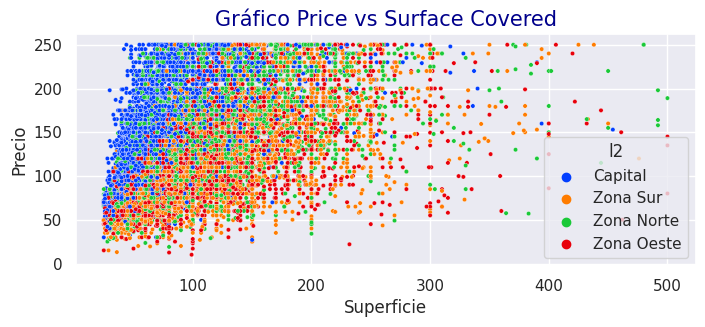

In [90]:
#Gráfico Precio vs Superficie con etiqueta l2
plt.figure(figsize=(8,3))
plt.title('Gráfico Price vs Surface Covered', fontsize=15, color='darkblue')
plt.ylabel('Precio', fontsize=12);
plt.xlabel('Superficie', fontsize=12);
sns.scatterplot(data=dt, x='surface_covered', y='price', s=10, hue='l2', palette='bright')
plt.show()

# **MODELO DE REGRESIÓN LINEAL SIMPLE**

# y = b0 + b1x1

In [91]:
#Importar librería para regresión lineal, forma 1: Statsmodels
import statsmodels.formula.api as smf

In [92]:
#Revisamos cuáles son las columnas que tenemos en nuestro dataset
dt.columns

Index(['l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_covered', 'price',
       'property_type'],
      dtype='object')

In [93]:
dt.describe()

,rooms,bedrooms,bathrooms,surface_covered,price
count,15798.000000,15798.000000,15798.000000,15798.000000,15798.000000
mean,3.603811,2.416635,1.436291,107.586213,142.127775
std,1.109594,0.909799,0.592459,58.201436,54.806725
min,1.000000,0.000000,1.000000,25.000000,10.000000
25%,3.000000,2.000000,1.000000,65.000000,98.000000
50%,3.000000,2.000000,1.000000,95.000000,139.000000
75%,4.000000,3.000000,2.000000,136.000000,180.000000
max,7.000000,6.000000,3.000000,500.000000,250.000000


<ipython-input-94-0c211972d8a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_corr=dt[['l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_covered',


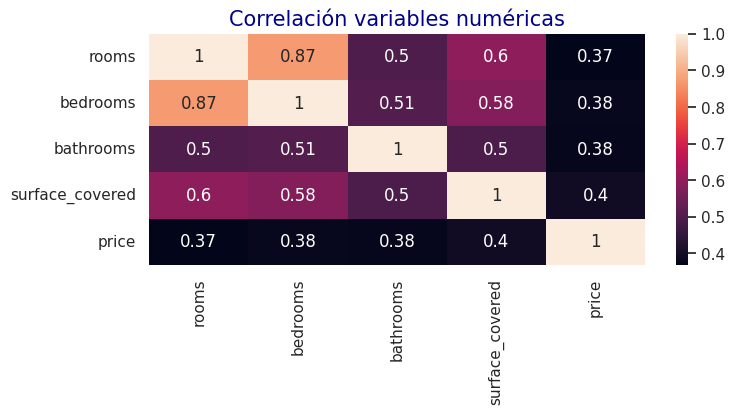

In [94]:
dt_corr=dt[['l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_covered',
       'price', 'property_type']].corr(method='pearson')
plt.figure(figsize=(8,3))
plt.title('Correlación variables numéricas', fontsize=15, color='darkblue')
sns.heatmap(dt_corr, annot=True)
plt.show()

In [95]:
#Eliminaremos bedrooms
dt=dt.drop(['bedrooms'], axis=1)

In [96]:
dt.head()

,l2,rooms,bathrooms,surface_covered,price,property_type
1,Capital,2.0,2.0,58.0,159.0,PH
2,Capital,2.0,1.0,45.0,125.0,PH
4,Zona Sur,2.0,1.0,35.0,40.0,PH
5,Capital,2.0,1.0,56.0,150.0,PH
6,Capital,2.0,1.0,70.0,159.5,PH


In [97]:
#Regresión Lineal Simple
rls=smf.ols(formula='price~surface_covered',data=dt).fit()

In [98]:
#Resumen de la regresión
rls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2967.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:27:45   Log-Likelihood:                -84309.
No. Observations:               15798   AIC:                         1.686e+05
Df Residuals:                   15796   BIC:                         1.686e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         101.8436      0.841    121.111      0.000     100.195     103.492
surface_covered     0.3744      0.007     54.466      0.000       0.361       0.388
==============================================================================
Omnibus:                      286.692   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.219
Skew:                           0.166   Prob(JB):                     3.33e-44
Kurtosis:                       2.559   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# price_gorro = 101.8436 + 0.3744 surface_covered

In [242]:
#Predecir 'price' a partir de nuestro modelo
pred_rls=rls.predict(dt['surface_covered'])

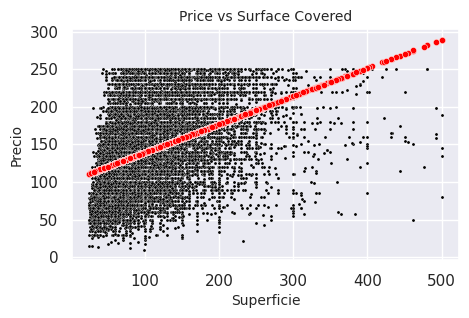

In [243]:
#Graficamos la regresión junto con los datos
plt.figure(figsize=(5,3))
plt.title('Price vs Surface Covered', fontsize=10)
plt.ylabel('Precio', fontsize=10);
plt.xlabel('Superficie', fontsize=10);
sns.scatterplot(data=dt, x='surface_covered', y='price', s=5, color='black')
sns.scatterplot(data=dt, x='surface_covered', y=pred_rls, s=20, color='red')
plt.show()


# **MODELO REGRESIÓN LINEAL MÚLTIPLE**

# y = b0 + b1x1 + b2x2 + ... + bpxp

In [99]:
#Variables dummies:
dt=pd.get_dummies(dt)
dt.head(10)


,rooms,bathrooms,surface_covered,price,l2_Capital,l2_Zona Norte,l2_Zona Oeste,l2_Zona Sur,property_type_Casa,property_type_PH
1,2.0,2.0,58.0,159.0,1,0,0,0,0,1
2,2.0,1.0,45.0,125.0,1,0,0,0,0,1
4,2.0,1.0,35.0,40.0,0,0,0,1,0,1
5,2.0,1.0,56.0,150.0,1,0,0,0,0,1
6,2.0,1.0,70.0,159.5,1,0,0,0,0,1
8,1.0,1.0,37.0,89.0,1,0,0,0,0,1
10,2.0,2.0,49.0,170.0,1,0,0,0,0,1
125,3.0,1.0,250.0,210.0,0,0,0,1,0,1
126,3.0,1.0,130.0,150.0,0,0,0,1,0,1
127,3.0,1.0,70.0,159.5,1,0,0,0,0,1


In [100]:
#Regresión Lineal Múltiple: Surface Covered y Rooms
rlm=smf.ols(formula='price~surface_covered+rooms',data=dt).fit()

In [101]:
#Resumen de la regresión
rlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1794.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:29:55   Log-Likelihood:                -84051.
No. Observations:               15798   AIC:                         1.681e+05
Df Residuals:                   15795   BIC:                         1.681e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          77.7751      1.338     58.108      0.000      75.152      80.399
surface_covered     0.2597      0.008     30.851      0.000       0.243       0.276
rooms              10.1027      0.442     22.876      0.000       9.237      10.968
==============================================================================
Omnibus:                      331.283   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.597
Skew:                           0.175   Prob(JB):                     1.70e-49
Kurtosis:                       2.532   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# price_gorro = 77.7751 + 0.2597 surface_covered + 10.1027 rooms

# **Otra librería para hacer regresión**

In [102]:
#Importar librería para regresión lineal, forma 2: SKLearn

#Para selección de variables
from sklearn.feature_selection import RFE
#Para la estimación del modelo
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [103]:
#Verificamos cuáles son todas las variables del modelo
dt.columns

Index(['rooms', 'bathrooms', 'surface_covered', 'price', 'l2_Capital',
       'l2_Zona Norte', 'l2_Zona Oeste', 'l2_Zona Sur', 'property_type_Casa',
       'property_type_PH'],
      dtype='object')

In [104]:
#Selecciono las potenciales variables predictoras (todas menos price)
x_pred = ['rooms', 'bathrooms', 'surface_covered',
          'l2_Capital', 'l2_Zona Norte', 'l2_Zona Oeste', 'l2_Zona Sur',
       'property_type_Casa', 'property_type_PH']

In [105]:
#Seteo cuál es mi conjunto de variables predictoras y cuál es mi variable dependiente
#Ojo que x_pred es una variable
x = dt[x_pred]
y = dt['price']

In [106]:
#Corre en 3:35 minutos
estimador = SVR(kernel='linear')

seleccion = RFE(estimador, n_features_to_select=2, step=1)
seleccion = seleccion.fit(x,y)

In [122]:
#Qué variables seleccionó python?
seleccion.support_

array([False,  True, False,  True, False, False, False, False, False])

In [110]:
#Una mejor vista para identificar qué variables identificó:
list(zip(x_pred, seleccion.support_))

[('rooms', False),
 ('bathrooms', True),
 ('surface_covered', False),
 ('l2_Capital', True),
 ('l2_Zona Norte', False),
 ('l2_Zona Oeste', False),
 ('l2_Zona Sur', False),
 ('property_type_Casa', False),
 ('property_type_PH', False)]

In [111]:
#Ranking para agregar variables al modelo:
seleccion.ranking_

array([5, 1, 7, 1, 8, 4, 3, 6, 2])

In [112]:
#Una mejor vista para identificar el ranking:
list(zip(x_pred, seleccion.ranking_))

[('rooms', 5),
 ('bathrooms', 1),
 ('surface_covered', 7),
 ('l2_Capital', 1),
 ('l2_Zona Norte', 8),
 ('l2_Zona Oeste', 4),
 ('l2_Zona Sur', 3),
 ('property_type_Casa', 6),
 ('property_type_PH', 2)]

In [115]:
#Nuevas variables para predecir:
x_pred_2 = x[['bathrooms','l2_Capital']]

In [116]:
#Genero la regresión lineal
rlm_2 = LinearRegression()
rlm_2.fit(x_pred_2, y)

LinearRegression()

In [117]:
#Busco cuál es el intercepto de mi regresión:
rlm_2.intercept_

77.55701897796192

In [118]:
#Busco cuáles son los coeficientes de mi regresión:
rlm_2.coef_

array([38.14995716, 31.96321585])

In [120]:
list(zip(rlm_2.coef_, x_pred_2))

[(38.149957159103145, 'bathrooms'), (31.963215845781733, 'l2_Capital')]

# **y = 77.557 +38.150 bathrooms + 31.963 l2_Capital**

In [125]:
#Coeficiente de determinación R2
rlm_2.score(x_pred_2, y)

0.21255448074416694

In [128]:
seleccion.ranking_

array([5, 1, 7, 1, 8, 4, 3, 6, 2])

In [127]:
x_pred

['rooms',
 'bathrooms',
 'surface_covered',
 'l2_Capital',
 'l2_Zona Norte',
 'l2_Zona Oeste',
 'l2_Zona Sur',
 'property_type_Casa',
 'property_type_PH']

In [153]:
#import patsy

In [154]:
#Regresión Lineal Múltiple con todas las variables
rlm_final=smf.ols(formula='price~bathrooms+l2_Capital+property_type_PH+Q("l2_Zona Sur")+Q("l2_Zona Oeste")+rooms+property_type_Casa+surface_covered',data=dt).fit()

In [156]:
rlm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     1263.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:26:50   Log-Likelihood:                -82155.
No. Observations:               15798   AIC:                         1.643e+05
Df Residuals:                   15790   BIC:                         1.644e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.3102      1.002     38.248      0.000      36.347      40.274
bathrooms             15.4191      0.714     21.609      0.000      14.020      16.818
l2_Capital            33.5883      1.092     30.748      0.000      31.447      35.729
property_type_PH      16.6797      0.618     26.983      0.000      15.468      17.891
Q("l2_Zona Sur")     -20.0394      1.021    -19.629      0.000     -22.040     -18.038
Q("l2_Zona Oeste")   -18.7792      1.056    -17.788      0.000     -20.849     -16.710
rooms                  8.1442      0.412     19.773      0.000       7.337       8.951
property_type_Casa    21.6305      0.735     29.432      0.000      20.190      23.071
surface_covered        0.2976      0.008     35.445      0.000       0.281       0.314
==============================================================================
Omnibus:                       70.774   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.677
Skew:                           0.165   Prob(JB):                     2.73e-16
Kurtosis:                       2.976   Cond. No.                     5.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.4e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""